<a href="https://colab.research.google.com/github/abdullah-imtiaz/PCA-Kmeans-with-iris-dataset/blob/master/PCA%2C_Kmeans_with_iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Principal Component Analysis (PCA), K-means-clustering with Iris Dataset**

### **Imports**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

style.use('seaborn')

### **Dataset from Sklearn**

In [53]:
iris = datasets.load_iris()
X = iris.data
label = iris.target

df = pd.DataFrame(data = X, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [54]:
df['species'] = pd.Categorical.from_codes(label, iris.target_names)
df['targets'] = label
print(df["species"].unique())

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]


In [55]:
df.shape

(150, 6)

### **Pair Plot across all columns**

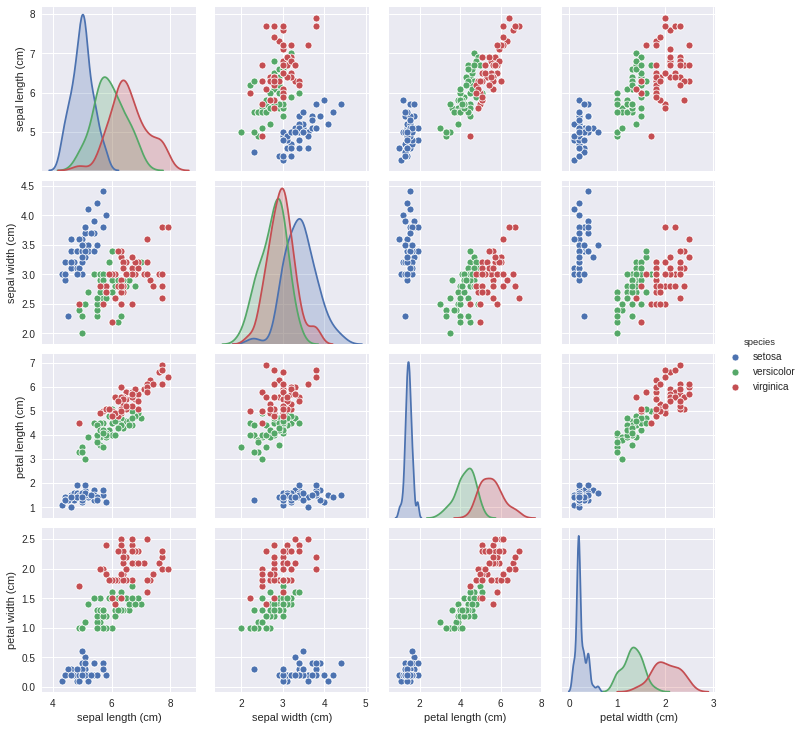

In [56]:
sns.pairplot(data = df.drop(['targets'], axis = 1), kind ='scatter', hue ='species')

### **Elbow Method for determining optimal number of clusters, 3 in this case**

In [0]:
X = []
y = []

for i in range(1,26):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(df.drop(['targets', 'species'], axis = 1))

  X.append(i)

  wcss = kmeans.inertia_
  y.append(wcss)

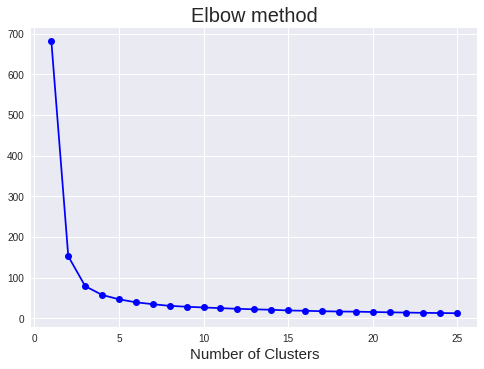

In [58]:
plt.title('Elbow method', fontsize = 20)
plt.xlabel('Number of Clusters', fontsize = 15)
plt.plot(X, y, 'bo-')

### **PCA, dimensions reduced from 4 to 2**





In [59]:
pca = PCA(n_components=2)
pc = pca.fit_transform(df.drop(['species', 'targets'], axis = 1))

pc[:10]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425]])

### **Kmeans applied on 2 dimensions**

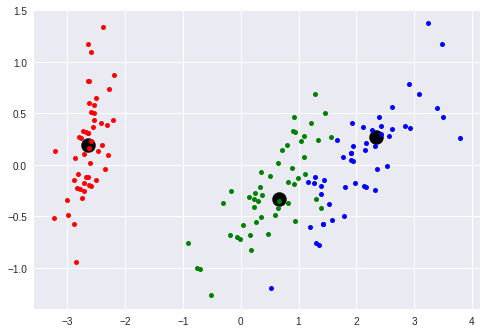

In [60]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(pc)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'o', s= 200, color = 'k')

for i,point in enumerate(pc):
  if label[i]== 0:
    plt.plot(point[0], point[1],  'r.', markersize = 10)
  if label[i] == 1:
    plt.plot(point[0], point[1], 'g.', markersize = 10)
  if label[i] == 2:
    plt.plot(point[0], point[1], 'b.', markersize=10)


### **PCA, dimensions reduced from 4 to 3**

In [61]:
pca = PCA(n_components=3)
pc = pca.fit_transform(df.drop(['species', 'targets'],  axis = 1))
pc[:10]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272]])

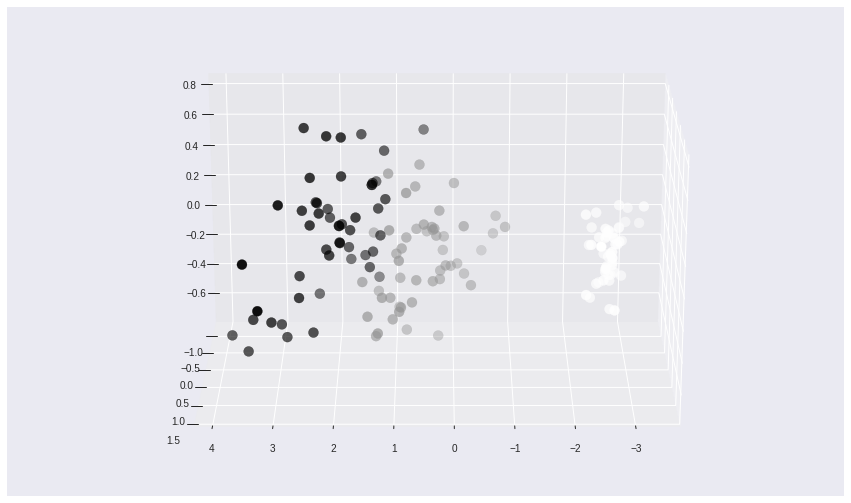

In [62]:
fig = plt.figure(figsize=(15, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[:,0], pc[:,1],pc[:,2], c=iris.target, s=100)
ax.view_init(20, 90)
plt.show()